# What does your development environment say about you?
When you go to write some code, what application do you open? Jupyter notebook? ATOM? RStudio? Integrated Development Environments (IDEs) are central to data science and analytical workflows. In this analysis we will take a look into which IDEs repondents of the Kaggle 2018 survey say they use. By looking mainly on the tools Kagglers use we can gain many insights about the kaggle community as a whole.

<table align="center"><tr>
<td>    <img src="http://jupyter.org/assets/main-logo.svg" alt="Jupyter" style="width: 100px;"> </td>
<td>    <img src="https://www.rstudio.com/wp-content/uploads/2014/06/RStudio-Ball.png" alt="RStudio" style="width: 100px;"> </td>
<td>   <img src="https://caktus-website-production-2015.s3.amazonaws.com/media/blog-images/logo.png" alt="PyCharm" style="width: 100px;"> </td>
<td>   <img src="https://upload.wikimedia.org/wikipedia/commons/f/f5/Notepad_plus_plus.png" alt="Notepad" style="width: 100px;"> </td>
<td>   <img src="https://upload.wikimedia.org/wikipedia/en/thumb/d/d2/Sublime_Text_3_logo.png/150px-Sublime_Text_3_logo.png" alt="Sublime" style="width: 100px;"> </td>
<td>   <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/2d/Visual_Studio_Code_1.18_icon.svg/1028px-Visual_Studio_Code_1.18_icon.svg.png" alt="VSC" style="width: 100px;"> </td>
<td>   <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/21/Matlab_Logo.png/220px-Matlab_Logo.png" alt="Matlab" style="width: 100px;"> </td>
 <td>   <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/80/Atom_editor_logo.svg/2000px-Atom_editor_logo.svg.png" alt="Atom" style="width: 100px;"> </td>
 </tr></table>
    
## In this analysis we will explore the 2018 Kaggle Survey Results, specifically Q13 related to IDE usage:
`Q13: Which of the following integrated development environments (IDE's) have you used at work or school in the last 5 years?`

Later we will use unsupervised machine learning techniques to identify the 4 types of kagglers based on IDE use. Suprisingly, these groups are quite unique and divide our population roughly into 4 equal parts.
- **The Jupyter Lover** - Respondents who primarily use Jupyter as their development environment.
- **Jack of All IDEs** -  These respondents use a wide range of IDEs.
- **RStudio + Jupyter** - This group consists of users who use RStudio and Jupyter.
- **Never Jupyters** - This group consists of respondents who either don't use development software, or use a specialized IDE exclusively. The commonality among these users is that they do not use Jupyter.

## First, lets look at overall IDE use for Kaggle 2018 Survey respondents.
**Some general questions we will explore:**
1. Generally what IDEs do respondents say they've used? Is there a specific type of IDE that is more or less common among respondents? Are there IDEs that are commonly used together? How does this compare to other tech communities like Stack Overflow?
2. Are there other respondent details that correlate with the IDE they use? Do respondents who use specific IDEs typically make more or less money? Do specific job titles trend toward specific IDEs?
3. What were some of the freeform responses? What IDEs should be included next year as a selection?

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
import seaborn as sns
from matplotlib_venn import venn3, venn2
warnings.filterwarnings("ignore")
import matplotlib.pylab as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

# Read Multiple Choice Responses
mc = pd.read_csv('../input/multipleChoiceResponses.csv')

In [2]:
# Data Prep

# Pull just IDE Questions
ide_qs = mc[['Q13_Part_1','Q13_Part_2','Q13_Part_3','Q13_Part_4','Q13_Part_5',
             'Q13_Part_6','Q13_Part_7','Q13_Part_8','Q13_Part_9','Q13_Part_10',
             'Q13_Part_11','Q13_Part_12','Q13_Part_13','Q13_Part_14','Q13_Part_15']].drop(0)


# Rename Columns for IDE Type
column_rename = {'Q13_Part_1': 'Jupyter/IPython',
                 'Q13_Part_2': 'RStudio',
                'Q13_Part_3': 'PyCharm',
                'Q13_Part_4': 'Visual Studio Code',
                'Q13_Part_5': 'nteract',
                'Q13_Part_6': 'Atom',
                'Q13_Part_7': 'MATLAB',
                'Q13_Part_8': 'Visual Studio',
                'Q13_Part_9': 'Notepad++',
                'Q13_Part_10': 'Sublime Text',
                'Q13_Part_11': 'Vim',
                'Q13_Part_12': 'IntelliJ',
                'Q13_Part_13': 'Spyder',
                'Q13_Part_14': 'None',
                'Q13_Part_15': 'Other',
                }

# Make binary columns from IDE answers.
ide_qs_binary = ide_qs.rename(columns=column_rename).fillna(0).replace('[^\\d]',1, regex=True)
mc_and_ide = pd.concat([mc.drop(0), ide_qs_binary], axis=1)

# Overall IDE Popularity
Takeaways:
* Jupyter is a big favorite, with over 70% of repondents using it.
* RStudio leads up the rest of the pack. It's safe to say that respondents who code esclusively in R would prefer RStudio as their main IDE.
* Notepad++ is the top pure text editor, above Sublime.
* Some reponded with *None*.  Is it safe to assume that these people don't code?

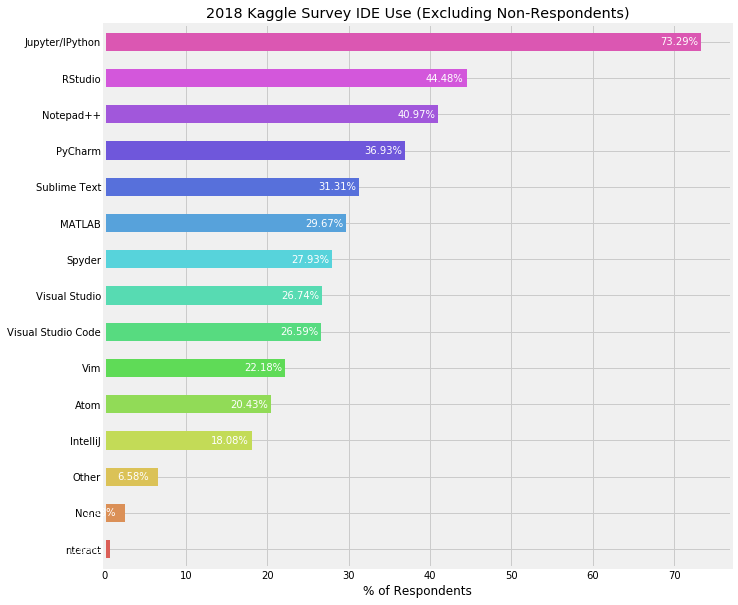

In [3]:
color_pal = sns.color_palette("hls", 16)
ide_qs_binary_drop_noresponse = ide_qs_binary.copy()
ide_qs_binary_drop_noresponse['no reponse'] = ide_qs_binary_drop_noresponse.sum(axis=1).apply(lambda x: 1 if x == 0 else 0)
ide_qs_binary_drop_noresponse = ide_qs_binary_drop_noresponse.loc[ide_qs_binary_drop_noresponse['no reponse'] == 0].drop('no reponse', axis=1).copy()

plot_df = ((ide_qs_binary_drop_noresponse.sum() / ide_qs_binary_drop_noresponse.count()).sort_values() * 100 ).round(2)
ax = plot_df.plot(kind='barh', figsize=(10, 10),
          title='2018 Kaggle Survey IDE Use (Excluding Non-Respondents)',
          color=color_pal)
for i, (p, pr) in enumerate(zip(plot_df.index, plot_df.values)):
    #plt.text(s=p, x=1, y=i, color="w", verticalalignment="center", size=18)
    plt.text(s=str(pr)+"%", x=pr-5, y=i, color="w",
             verticalalignment="center", horizontalalignment="left", size=10)
ax.set_xlabel("% of Respondents")
plt.show()

# Kaggle vs.  StackOverflow IDE Use
The 2018 Stack Overflow survey posed a very similar question we can compare the results with to see how kaggle compares to the stack overflow community regarding IDE use. This data was taken from the [stackoverflow developer survey results](https://insights.stackoverflow.com/survey/2018/).

Some observations about the comparison:
- Notepad ++ is popular for both communities. 40.97% of Kaggle respondents and 34.2% of Stackoverflow respondents have used it.
- Jupyter/IPython is much more popular among kagglers, as expected. But the difference is staggering, with 73.29% of kaggle respondents using it and only 7.4% of stackoverflow respondents saying they use it.
- Visual Studio and Visual Studio Code are the most popular of the stackoverflow developers, but relatively less popular for kagglers.

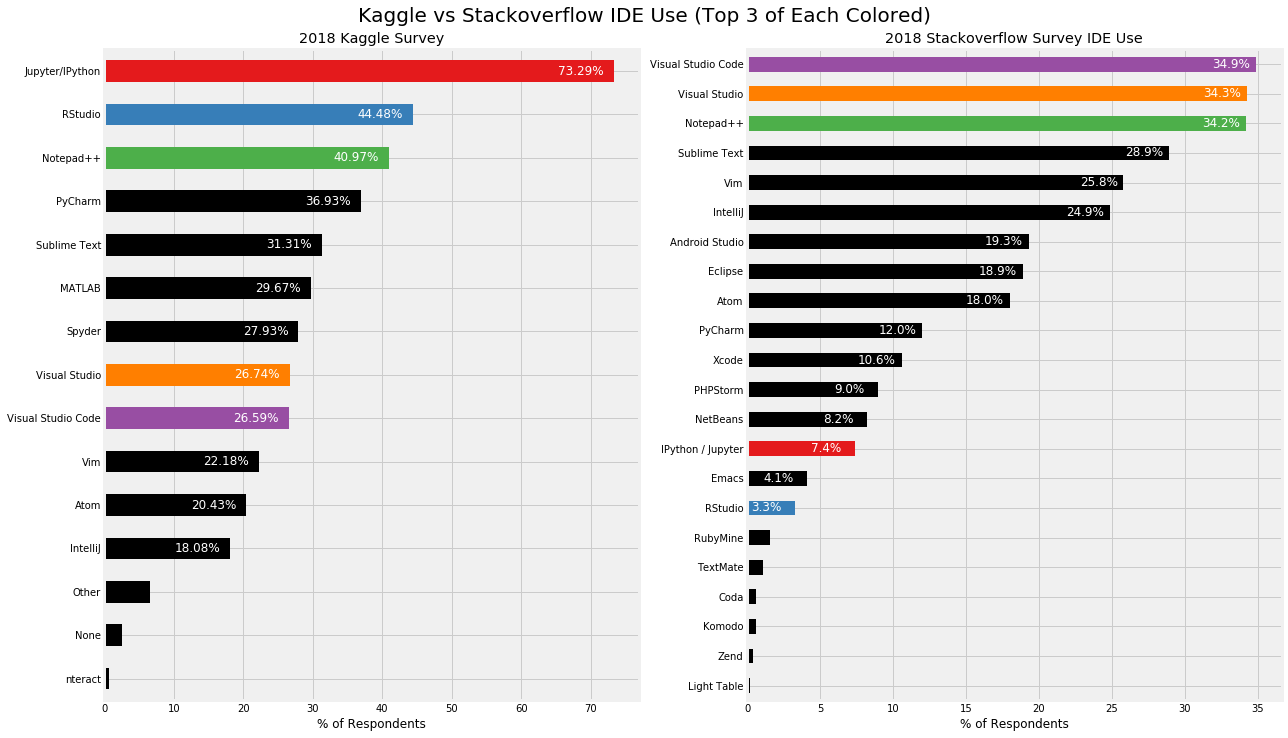

In [4]:
# Results manually pulled from report found here: https://insights.stackoverflow.com/survey/2018/
stackoverflow_results = {'Visual Studio Code': 34.9,
                         'Visual Studio':  34.3,
                         'Notepad++': 34.2,
                         'Sublime Text': 28.9,
                         'Vim': 25.8,
                         'IntelliJ': 24.9,
                         'Android Studio': 19.3,
                         'Eclipse': 18.9,
                         'Atom': 18.0,
                         'PyCharm': 12.0,
                         'Xcode': 10.6,
                         'PHPStorm': 9.0,
                         'NetBeans': 8.2,
                         'IPython / Jupyter': 7.4,
                         'Emacs': 4.1,
                         'RStudio': 3.3,
                         'RubyMine': 1.6,
                         'TextMate': 1.1,
                         'Coda': 0.6,
                         'Komodo': 0.6,
                         'Zend': 0.4,
                         'Light Table': 0.2,
                         }
so_df = pd.DataFrame(stackoverflow_results, index=[0]).T.sort_values(0)

# Colors
color_pal = sns.color_palette("Set1", 5)
Jupyter_color = color_pal[0]
Rstudio_color = color_pal[1]
notepad_color = color_pal[2]
vs_code_color = color_pal[3]
vs_color = color_pal[4]
# Kaggle
fig = plt.figure(figsize=(18, 10))
plt.subplot(1, 2, 1)
plot_df = ((ide_qs_binary_drop_noresponse.sum() / ide_qs_binary_drop_noresponse.count()).sort_values() * 100 ).round(2)
ax1 = plot_df.plot(kind='barh',
          title='2018 Kaggle Survey',
          color=['k','k','k','k','k',
                 'k',vs_code_color,vs_color,'k','k',
                 'k','k',notepad_color,Rstudio_color,Jupyter_color])
for i, (p, pr) in enumerate(zip(plot_df.index, plot_df.values)):
   #plt.text(s=p, x=1, y=i, color="w", verticalalignment="center", size=18)
    if pr > 10:
        plt.text(s=str(pr)+"%", x=pr-8, y=i, color="w",
                 verticalalignment="center", horizontalalignment="left", size=12)
ax1.set_xlabel("% of Respondents")
# Stackoverflow
plt.subplot(1, 2, 2)

ax2 = so_df[0].plot(kind='barh',
          title='2018 Stackoverflow Survey IDE Use',
          color=['k','k','k','k','k',
                 'k',Rstudio_color,'k',Jupyter_color,'k',
                 'k','k','k','k','k',
                 'k','k','k','k',notepad_color,
                 vs_color,vs_code_color],
          legend=False,
          ax=plt.gca())
plt.set_cmap('Blues')
ax2.set_xlabel("% of Respondents")
for i, (p, pr) in enumerate(zip(so_df.index, so_df[0].values)):
    if pr > 3:
        plt.text(s=str(pr)+"%", x=pr-3, y=i, color="w",
             verticalalignment="center", horizontalalignment="left", size=12)
plt.suptitle('Kaggle vs Stackoverflow IDE Use (Top 3 of Each Colored)', fontsize = 20, y=1.02)
plt.tight_layout()
# plt.style.use('fivethirtyeight')
plt.show()

# Overlap Between IDE Useage
Seeing which IDEs are popular is one thing, but more importantly we want to know which software users tend to use together. We can start by making venn-diagrams with the most popular IDES. These are interesting because we can not only see how many people have used the IDE, but also comminality in IDE use.

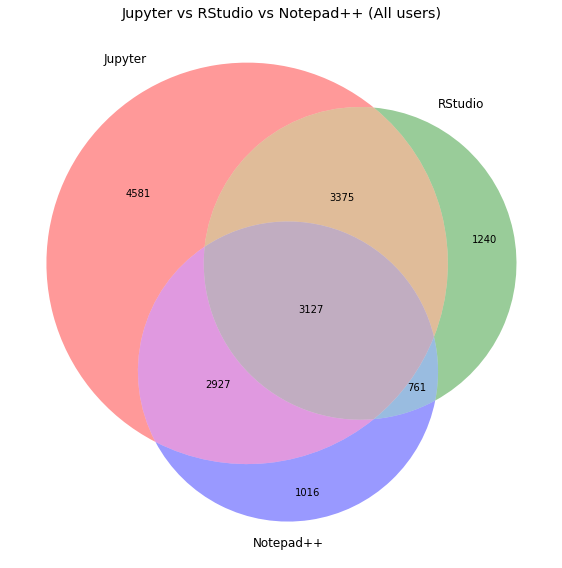

In [5]:
plt.figure(figsize=(15, 8))

venn3(subsets=(len(ide_qs_binary.loc[(ide_qs_binary['Jupyter/IPython'] == 1) & (ide_qs_binary['RStudio'] == 0) & (ide_qs_binary['Notepad++'] == 0)]),
               len(ide_qs_binary.loc[(ide_qs_binary['Jupyter/IPython'] == 0) & (ide_qs_binary['RStudio'] == 1) & (ide_qs_binary['Notepad++'] == 0)]),
               len(ide_qs_binary.loc[(ide_qs_binary['Jupyter/IPython'] == 1) & (ide_qs_binary['RStudio'] == 1) & (ide_qs_binary['Notepad++'] == 0)]),
               len(ide_qs_binary.loc[(ide_qs_binary['Jupyter/IPython'] == 0) & (ide_qs_binary['RStudio'] == 0) & (ide_qs_binary['Notepad++'] == 1)]),
               len(ide_qs_binary.loc[(ide_qs_binary['Jupyter/IPython'] == 1) & (ide_qs_binary['RStudio'] == 0) & (ide_qs_binary['Notepad++'] == 1)]),
               len(ide_qs_binary.loc[(ide_qs_binary['Jupyter/IPython'] == 0) & (ide_qs_binary['RStudio'] == 1) & (ide_qs_binary['Notepad++'] == 1)]),
               len(ide_qs_binary.loc[(ide_qs_binary['Jupyter/IPython'] == 1) & (ide_qs_binary['RStudio'] == 1) & (ide_qs_binary['Notepad++'] == 1)])),
      set_labels=('Jupyter', 'RStudio', 'Notepad++'))
plt.title('Jupyter vs RStudio vs Notepad++ (All users)')
plt.tight_layout()
plt.show()

# Students Love Jupyter!

Nearly half of the Kaggle survey respondents answered that they were "students". Since jupyter has a large use within academia and teching, it's interesting to see how the venn diagram differs between students and non-student respondents. While Jupyter is still very popular amonst both groups, the overlap between jupyter and the next top two popular IDEs (RStudio and Notepad++) varies much less for students. For non-students there are some exclusive users of other development environments like RStudio and Notepad++, but also every student that uses these IDEs  has also had some interaction with Jupyter.

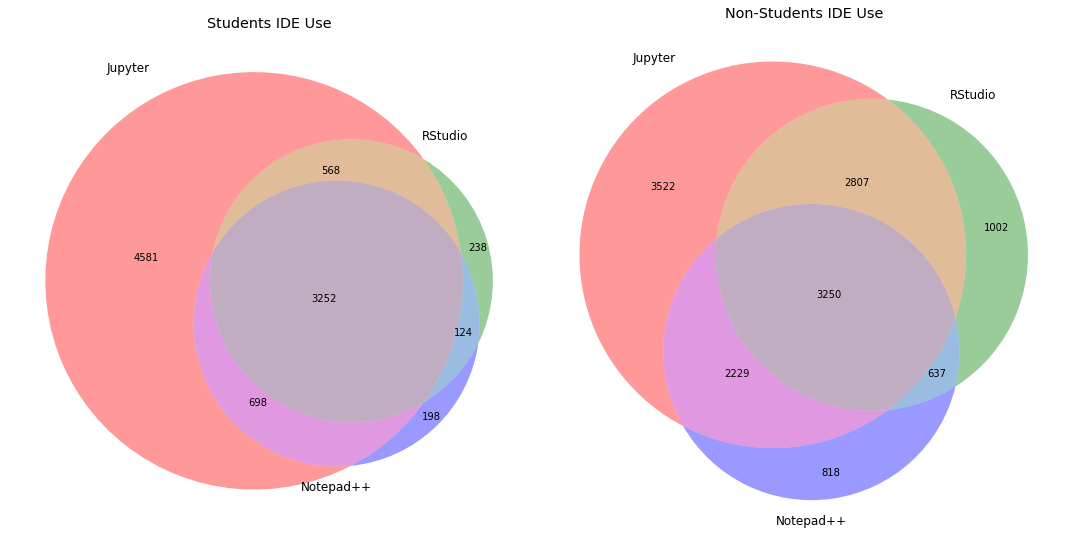

In [6]:
# Venn Diagram of 
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
venn3(subsets=(len(ide_qs_binary.loc[(ide_qs_binary['Jupyter/IPython'] == 1) & (ide_qs_binary['RStudio'] == 0) & (ide_qs_binary['Notepad++'] == 0 & (mc_and_ide['Q6'] == 'Student'))]),
               len(ide_qs_binary.loc[(ide_qs_binary['Jupyter/IPython'] == 0) & (ide_qs_binary['RStudio'] == 1) & (ide_qs_binary['Notepad++'] == 0)& (mc_and_ide['Q6'] == 'Student')]),
               len(ide_qs_binary.loc[(ide_qs_binary['Jupyter/IPython'] == 1) & (ide_qs_binary['RStudio'] == 1) & (ide_qs_binary['Notepad++'] == 0)& (mc_and_ide['Q6'] == 'Student')]),
               len(ide_qs_binary.loc[(ide_qs_binary['Jupyter/IPython'] == 0) & (ide_qs_binary['RStudio'] == 0) & (ide_qs_binary['Notepad++'] == 1)& (mc_and_ide['Q6'] == 'Student')]),
               len(ide_qs_binary.loc[(ide_qs_binary['Jupyter/IPython'] == 1) & (ide_qs_binary['RStudio'] == 0) & (ide_qs_binary['Notepad++'] == 1)& (mc_and_ide['Q6'] == 'Student')]),
               len(ide_qs_binary.loc[(ide_qs_binary['Jupyter/IPython'] == 0) & (ide_qs_binary['RStudio'] == 1) & (ide_qs_binary['Notepad++'] == 1)& (mc_and_ide['Q6'] == 'Student')]),
               len(ide_qs_binary.loc[(ide_qs_binary['Jupyter/IPython'] == 1) & (ide_qs_binary['RStudio'] == 1) & (ide_qs_binary['Notepad++'] == 1& (mc_and_ide['Q6'] == 'Student'))])),
      set_labels=('Jupyter', 'RStudio', 'Notepad++'))
plt.title('Students IDE Use')
plt.subplot(1, 2, 2)
venn3(subsets=(len(ide_qs_binary.loc[(ide_qs_binary['Jupyter/IPython'] == 1) & (ide_qs_binary['RStudio'] == 0) & (ide_qs_binary['Notepad++'] == 0) & (mc_and_ide['Q6'] != 'Student')]),
               len(ide_qs_binary.loc[(ide_qs_binary['Jupyter/IPython'] == 0) & (ide_qs_binary['RStudio'] == 1) & (ide_qs_binary['Notepad++'] == 0)& (mc_and_ide['Q6'] != 'Student')]),
               len(ide_qs_binary.loc[(ide_qs_binary['Jupyter/IPython'] == 1) & (ide_qs_binary['RStudio'] == 1) & (ide_qs_binary['Notepad++'] == 0)& (mc_and_ide['Q6'] != 'Student')]),
               len(ide_qs_binary.loc[(ide_qs_binary['Jupyter/IPython'] == 0) & (ide_qs_binary['RStudio'] == 0) & (ide_qs_binary['Notepad++'] == 1)& (mc_and_ide['Q6'] != 'Student')]),
               len(ide_qs_binary.loc[(ide_qs_binary['Jupyter/IPython'] == 1) & (ide_qs_binary['RStudio'] == 0) & (ide_qs_binary['Notepad++'] == 1)& (mc_and_ide['Q6'] != 'Student')]),
               len(ide_qs_binary.loc[(ide_qs_binary['Jupyter/IPython'] == 0) & (ide_qs_binary['RStudio'] == 1) & (ide_qs_binary['Notepad++'] == 1)& (mc_and_ide['Q6'] != 'Student')]),
               len(ide_qs_binary.loc[(ide_qs_binary['Jupyter/IPython'] == 1) & (ide_qs_binary['RStudio'] == 1) & (ide_qs_binary['Notepad++'] == 1& (mc_and_ide['Q6'] != 'Student'))])),
      set_labels=('Jupyter', 'RStudio', 'Notepad++'))
plt.title('Non-Students IDE Use')
plt.tight_layout()
plt.show()

# Notepad++ is the most popular 'text editor' but others are close behind.*
We can also gain insights by looking into IDEs that serve the same purpose. Since RStudio is typically used to code in R, and Jupyter is unique in it's interactive cells - what happens if we only look at text editors?

This is a pretty clean venn diagram. You can see that there are more exclusive Notepad++ users than PyCharm and Sublime Text, but the areas where they overlap are strikingly similar. The 1556 people in the center are possibly just people who enjoy trying out new software.  The question that is being asked states `[which IDE] have you used at work or school in the last 5 years?` This could mean that respondents aren't necessarily stating which IDE they like the most, just the ones they've used.

\* *It's important to note (as pointed out by @sciplic in the comments) Notepad++ is a Windows only text editor. To me this is even understates it's popularity since Mac and Linux users don't have it as an option.*

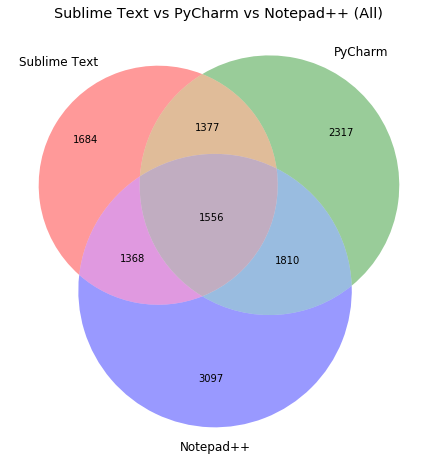

In [7]:
plt.figure(figsize=(15, 8))
venn3(subsets=(len(ide_qs_binary.loc[(ide_qs_binary['Sublime Text'] == 1) & (ide_qs_binary['PyCharm'] == 0) & (ide_qs_binary['Notepad++'] == 0)]),
               len(ide_qs_binary.loc[(ide_qs_binary['Sublime Text'] == 0) & (ide_qs_binary['PyCharm'] == 1) & (ide_qs_binary['Notepad++'] == 0)]),
               len(ide_qs_binary.loc[(ide_qs_binary['Sublime Text'] == 1) & (ide_qs_binary['PyCharm'] == 1) & (ide_qs_binary['Notepad++'] == 0)]),
               len(ide_qs_binary.loc[(ide_qs_binary['Sublime Text'] == 0) & (ide_qs_binary['PyCharm'] == 0) & (ide_qs_binary['Notepad++'] == 1)]),
               len(ide_qs_binary.loc[(ide_qs_binary['Sublime Text'] == 1) & (ide_qs_binary['PyCharm'] == 0) & (ide_qs_binary['Notepad++'] == 1)]),
               len(ide_qs_binary.loc[(ide_qs_binary['Sublime Text'] == 0) & (ide_qs_binary['PyCharm'] == 1) & (ide_qs_binary['Notepad++'] == 1)]),
               len(ide_qs_binary.loc[(ide_qs_binary['Sublime Text'] == 1) & (ide_qs_binary['PyCharm'] == 1) & (ide_qs_binary['Notepad++'] == 1)])),
      set_labels=('Sublime Text', 'PyCharm', 'Notepad++'))
plt.title('Sublime Text vs PyCharm vs Notepad++ (All)')
plt.show()

# Job Title and development environments

Let's work off of the hypothesis that the type of work you do will impact the type of tools you use. We compare the IDE use of different job types below. This chart allows us to see what percentage of professional groups use each IDE. 

Some interesting insights we can see are:
1. Jupyter/IPython is popular for pretty much every job title. This is obviously biased because the respondents also use kaggle! Surveying non-kaggler 
2. Statisticians use Jupyter the least (51.9%). Is this because they also tend to be R users (74.68% use RStudio)?
3. DBA/Database Engineers and Software Engineer are heavy Notepad++ users, but I find it personally suprising that Data Journalists and Developer Advocates also use this IDE.  What drives this similarity among disparate occupations?
4. Visual Studio and Visual Studio Code are popular amonst Developer Advocates and Software Engineers
5. Matlab looks to be quite popular within academia. Students, Research Assistants, Research Scientists, and Principal Investigators stand out as Matlab users.

In [8]:
# Pull just question6
ide_by_q6 = mc_and_ide \
    .rename(columns={'Q6':'Job Title'}) \
    .groupby('Job Title')['Jupyter/IPython','RStudio','PyCharm','Visual Studio Code',
                   'nteract','Atom','MATLAB','Visual Studio','Notepad++','Sublime Text',
                   'Vim','IntelliJ','Spyder','None','Other'] \
    .mean()

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "8pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "9pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '9pt')])
]
np.random.seed(25)
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
#bigdf = pd.DataFrame(np.random.randn(20, 25)).cumsum()
ide_by_q6.T.sort_values('Data Analyst', ascending=False).T \
    .sort_values('RStudio', ascending=False) \
    .rename(columns={'Jupyter/IPython': 'Jupyter',
                     'Visual Studio':'VStudio',
                     'Visual Studio Code': "VSCode",
                     'Sublime Text': 'Sublime'}) \
    [['Jupyter','RStudio','Notepad++','PyCharm','Spyder','Sublime','MATLAB','VStudio','VSCode']] \
    .sort_index() \
    .style.background_gradient(cmap, axis=1)\
    .set_precision(2)\
    .format("{:.0%}")

,Jupyter,RStudio,Notepad++,PyCharm,Spyder,Sublime,MATLAB,VStudio,VSCode
Job Title,,,,,,,,,
Business Analyst,55%,49%,38%,21%,26%,20%,18%,22%,17%
Chief Officer,64%,34%,26%,31%,18%,26%,19%,19%,29%
Consultant,61%,48%,39%,20%,25%,19%,19%,22%,18%
DBA/Database Engineer,61%,39%,58%,26%,25%,25%,17%,38%,28%
Data Analyst,56%,52%,36%,25%,24%,20%,18%,18%,16%
Data Engineer,67%,33%,40%,38%,20%,30%,20%,23%,28%
Data Journalist,40%,25%,35%,20%,0%,25%,15%,10%,15%
Data Scientist,77%,51%,35%,40%,31%,32%,23%,18%,21%
Developer Advocate,50%,22%,40%,23%,12%,30%,19%,36%,44%


# Correlations between IDEs and Salary

It's always fun to plot the data by salary.   Of course, we shoud be weary of drawing any causal conclusions from this analysis. Correlation does note equal causation! Don't change the IDE you use thinking it will make you more money.

*Note: I ignored NA values and those that answered "I do not wish to disclose my approximate yearly compensation" to the salary question. This may bias our results and should be considered.

Some takeaways:
- Each IDE appears to have it's own unique trend when looking at popularity vs. income which I find unexpected and interesting.
- RStudio use appears to have a somewhat normal distribution around the mid-salary range.
- PyCharm and VSCode appear to be fairly flat, with little changes in popularity around income.
- Notepad++ starts to trend downward as salary goes above \$100k. VIM trends upwards.

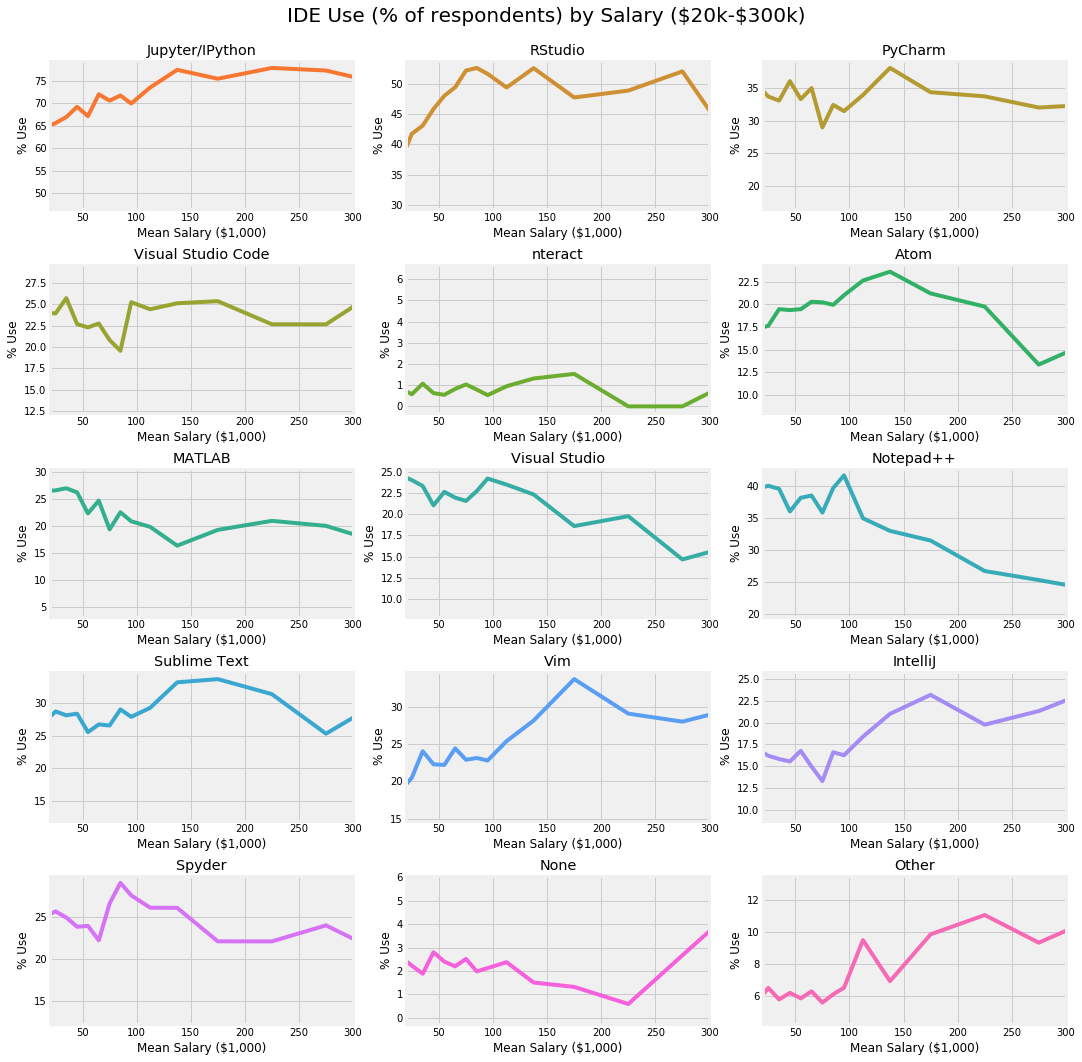

In [9]:
# Make Salary into a categorical so it can be sorted
salary_ordered = ['0-10,000' ,
                    '10-20,000',
                    '20-30,000',
                    '30-40,000',
                    '40-50,000',
                    '50-60,000',
                    '60-70,000',
                    '70-80,000',
                    '80-90,000',
                    '90-100,000',
                    '100-125,000',
                    '125-150,000',
                    '150-200,000',
                    '200-250,000',
                    '250-300,000',
                    '300-400,000',
                    '400-500,000',
                    '500,000+',
                  #  'I do not wish to disclose my approximate yearly compensation'
                 ]
mc_and_ide['Salary'] = pd.Categorical(mc_and_ide['Q9'], salary_ordered)


ide_salary_breakdown = mc_and_ide.groupby('Salary')['Jupyter/IPython','RStudio','PyCharm','Visual Studio Code',
                   'nteract','Atom','MATLAB','Visual Studio','Notepad++','Sublime Text',
                   'Vim','IntelliJ','Spyder','None','Other'].mean().sort_index()

ide_salary_breakdown['Mean Salary'] = [5, 15, 25, 35, 45, 55, 65, 75,
                                       85, 95, 112.500, 137.500, 175.000, 225.000, 275.000,
                                       350.000, 450.000, 550.000]

# Make the plots
fig, axes = plt.subplots(nrows=5, ncols=3, sharex=True, sharey=True, figsize=(15, 15))
color_pal = sns.color_palette("husl", 16)
n = 1
for col in ide_salary_breakdown.set_index('Mean Salary').columns:
    #print(col)
    plt.subplot(5, 3, n)
    (ide_salary_breakdown.set_index('Mean Salary')[col] * 100) \
        .plot(title=col, xlim=(20,300), color=color_pal[n])
    plt.ylabel('% Use')
    plt.xlabel('Mean Salary ($1,000)')
    n += 1
plt.subplots_adjust(hspace = 0.5)
plt.suptitle('IDE Use (% of respondents) by Salary (\$20k-$300k)', size=20)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

## Taking a closer look at the relationship between salary and IDE use
In the below chart we can see the raw number of respondents from each salary grouping. 
With a chart like this insights are usually in the abnormalities. For instance:
- Matlab is popular among those on the low range of salary. This is consistent with the fact that many students use Matlab. 
- PyCharm and Sublime Text catch up to Notepad++ in popularity in the higher salary range (\$100k+). Could this be because this is the salary range of a serious python developer?
- We can see the proportinal relationship between Jupyter and unix based text editors varies in salary range. We see a Jupyter to Vim ratio of almost `4:1` in the \$0-\$10k salary, but that drops down to a `2:1` ratio in the \$150-\$200k range. Could it be that those that have more job experience also spend more time in the unix shell?

In [10]:
salary_ide_counts = mc_and_ide.groupby('Salary')['Jupyter/IPython', 'RStudio', 'PyCharm',
                             'Visual Studio Code', 'nteract', 'Atom',
                             'MATLAB', 'Visual Studio', 'Notepad++',
                             'Sublime Text', 'Vim', 'IntelliJ', 'Spyder',
                             'None', 'Other'] \
    .sum() \
    .T \
    .sort_values('90-100,000', ascending=False) \
    .T \
    .sort_index() \
    .T

salary_ide_counts.columns = [str(col) for col in salary_ide_counts.columns]
salary_ide_counts['\$250k+'] = salary_ide_counts[['250-300,000', '300-400,000', '400-500,000', '500,000+']].sum(axis=1)
salary_ide_counts['\$150k-$250k'] = salary_ide_counts[['150-200,000', '200-250,000']].sum(axis=1)
salary_ide_counts['\$100k-$150k'] = salary_ide_counts[['100-125,000', '125-150,000']].sum(axis=1)
salary_ide_counts['\$80k-$100k'] = salary_ide_counts[['80-90,000', '90-100,000']].sum(axis=1)
salary_ide_counts['\$60k-$80k'] = salary_ide_counts[['60-70,000', '70-80,000']].sum(axis=1)
salary_ide_counts['\$40k-$60k'] = salary_ide_counts[['40-50,000', '50-60,000']].sum(axis=1)
salary_ide_counts['\$20k-$40k'] = salary_ide_counts[['20-30,000', '30-40,000']].sum(axis=1)
salary_ide_counts['\$0-$20k'] = salary_ide_counts[['0-10,000', '10-20,000']].sum(axis=1)

salary_ide_counts[['\$0-$20k','\$20k-$40k','\$40k-$60k','\$60k-$80k','\$80k-$100k','\$100k-$150k','\$150k-$250k','\$250k+']] \
    .style.background_gradient(cmap)

,\$0-$20k,\$20k-$40k,\$40k-$60k,\$60k-$80k,\$80k-$100k,\$100k-$150k,\$150k-$250k,\$250k+
Jupyter/IPython,3889,1664,1285,1003,759,1033,479,140
RStudio,2061,1064,883,713,558,696,302,86
Notepad++,2308,1002,699,524,437,471,190,51
PyCharm,2139,840,654,451,342,489,215,61
Sublime Text,1839,716,509,375,305,424,208,51
Spyder,1579,637,450,342,303,359,139,40
Visual Studio Code,1533,622,424,307,242,340,155,51
Visual Studio,1555,596,411,306,252,317,119,34
Vim,1052,555,419,333,246,364,204,57
Atom,1090,464,366,285,220,317,131,31


# The country you reside and your IDE
(Results shown are % of respondents who use the IDE within the county)

Some really interesting insights can be drawn from looking at IDE use by country.  To keep things simple I'm only looking at the top 10 countries (and later top 5) by respondents. This is only to keep the visualizations easy to read and gain insights.

Some insights that stand out are:
- China and Russia have less love for RStudio compared to other countries. They also appear to be heavier PyCharm users.
- Jupyter is not as popular in China as in other countries, with only 46% of chinese respondents saying they use Jupyer. China also has more than average MATLAB users.
- Visual Studio Code is popular in Brazil with 30% of brazilians saying they've used it.
- Spyder apears to have a slightly stronger following in India than in other countries.

In [11]:
# Make a sorted list of country by number of responses.
country_sorted = mc_and_ide.groupby('Q3').count().sort_values('Q1', ascending=False).index

country_ide_stats = mc_and_ide.groupby('Q3')['Jupyter/IPython','RStudio','PyCharm',
                                             'Visual Studio Code',
                   'nteract','Atom','MATLAB','Visual Studio','Notepad++','Sublime Text',
                   'Vim','IntelliJ','Spyder','None','Other'] \
    .mean()
country_ide_stats.index = pd.Categorical(country_ide_stats.index, country_sorted)
country_ide_stats.sort_index()[:10] \
    .rename({'United Kingdom of Great Britain and Northern Ireland':'GB/N.Ireland',
             'United States of America':'USA'}) \
    .T \
    .sort_values('USA', ascending=False) \
    .style.background_gradient(cmap, axis=0).format("{:.0%}")

,USA,India,China,Other,Russia,Brazil,Germany,GB/N.Ireland,France,Canada
Jupyter/IPython,63%,58%,46%,53%,68%,61%,62%,68%,59%,62%
RStudio,48%,33%,11%,36%,20%,38%,36%,45%,40%,37%
Notepad++,31%,38%,25%,38%,32%,30%,37%,35%,33%,33%
Sublime Text,27%,26%,18%,26%,27%,33%,22%,24%,26%,24%
PyCharm,26%,25%,42%,28%,43%,25%,38%,32%,28%,30%
Vim,23%,14%,18%,14%,18%,16%,21%,21%,19%,22%
Spyder,23%,29%,18%,20%,15%,21%,19%,25%,26%,20%
MATLAB,23%,20%,31%,22%,17%,22%,29%,28%,27%,24%
Visual Studio,21%,19%,22%,26%,27%,17%,20%,21%,19%,22%
Atom,20%,15%,5%,16%,11%,20%,19%,23%,18%,21%


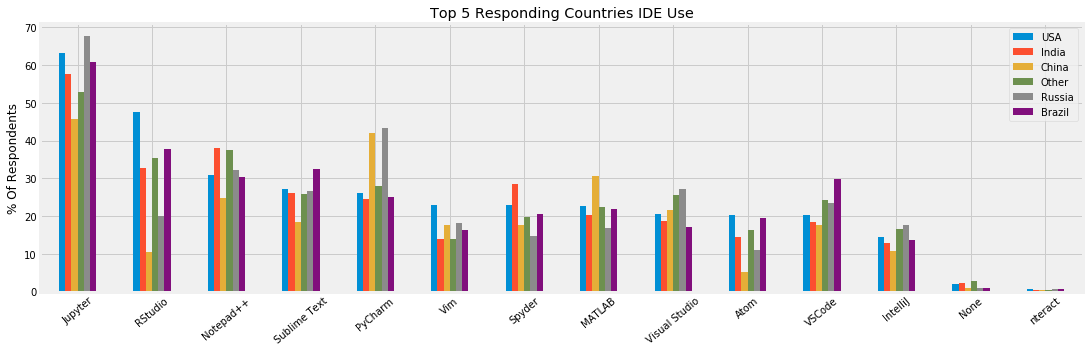

In [12]:
(country_ide_stats.sort_index() \
     .rename(columns={'Visual Studio Code': 'VSCode', 'Jupyter/IPython' : 'Jupyter'})[:6].drop('Other',axis=1) \
    .rename({'United Kingdom of Great Britain and Northern Ireland':'GB/N.Ireland',
             'United States of America':'USA'}) \
    .T \
    .sort_values('USA', ascending=False) * 100) \
    .plot(kind='bar', figsize=(15, 5), title='Top 5 Responding Countries IDE Use', rot=40)
plt.tight_layout()
plt.ylabel('% Of Respondents')
plt.show()

# IDE Use By Age
We can also take a look at how age and IDE use relate. Suprisingly age did not appear to have any overwhelmingly apparent correlations with IDE use. It does appear that RStudio is less popular proportionally amonst the younger respondents (Ages 18-24).

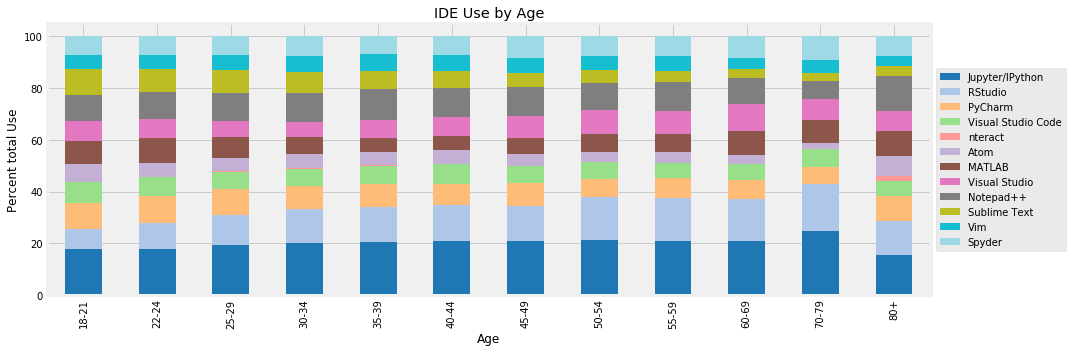

In [13]:
age_ide_counts = mc_and_ide.groupby('Q2')['Jupyter/IPython','RStudio','PyCharm','Visual Studio Code',
                   'nteract','Atom','MATLAB','Visual Studio','Notepad++','Sublime Text',
                   'Vim','Spyder'] \
    .sum()

age_ide_counts.apply(lambda x: x / x.sum() * 100, axis=1) \
    .plot(kind='bar',
          stacked=True,
          figsize=(15, 5),
          title="IDE Use by Age",
          colormap=plt.get_cmap('tab20'))
plt.style.use('ggplot')
plt.ylabel('Percent total Use')
plt.xlabel('Age')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()
plt.show()

When we plot the age distribution of each IDE out individually we can see that the 22-24 age group stands out as different depending on IDE. Could this be because 22-24 year olds are still deciding on which IDE they prefer- or could it simply be that school requires them to use different IDEs than the older population?

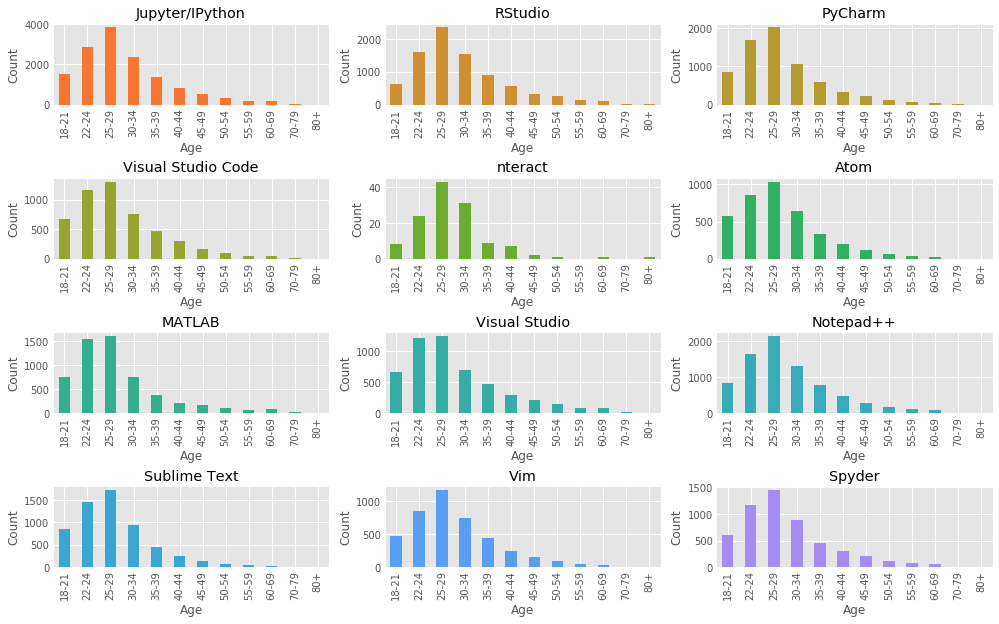

In [14]:
color_pal = sns.color_palette("husl", 16)
fig, axes = plt.subplots(nrows=4, ncols=3, sharex=True, sharey=True, figsize=(15, 10))
n = 1
for col in age_ide_counts.columns:
    plt.subplot(4, 3, n)
    age_ide_counts[col].plot.bar(title=col, color=color_pal[n])
    plt.xlabel('Age')
    plt.ylabel('Count')
    n += 1
plt.subplots_adjust(hspace = 0.9)
#plt.style.use('fivethirtyeight')
plt.show()

# Hosted Notebooks and IDEs
As we've already seen, jupyter notebooks are quite popular in the kaggle community. But what about jupyter-like hosted notebooks?  We could make the argument that these are IDEs aswell. Lets look at the popularity of hosted notebooks from the kaggle survey.
- Over 30% of respondents have no experience with hosted notebooks
- Not suprisingly Kaggle Kernels are the most popular for kaggle respondents with roughtly 25% of respondents saying they've used them. What may be more suprising is how close the next two popular hosted notebooks are. JupyterHub/binder being used by 20% and Google Colab by 14.8%.
- After that it's a steep dropoff to the next types of hosted kernels.

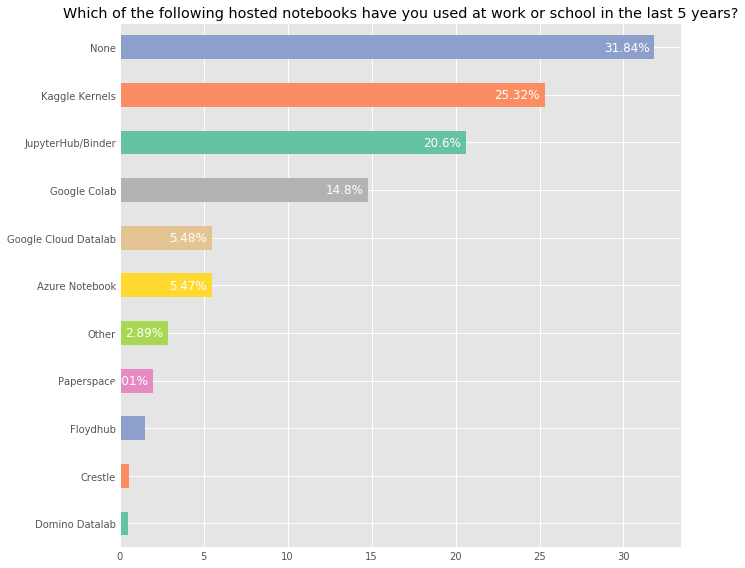

In [15]:
color_pal = sns.color_palette("Set2", 11)

notebook_cols = []
for x in mc.columns:
    if x[:3] == 'Q14':
        notebook_cols.append(x)

notebook_qs = mc[notebook_cols]
colname_replace = {}
for x in notebook_qs.columns:
    col_newname = notebook_qs[x][0].replace('Which of the following hosted notebooks have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice - ','')
    colname_replace[x] = col_newname
colname_replace['Q14_OTHER_TEXT'] = 'Text'
notebook_qs = notebook_qs.rename(columns=colname_replace).drop(0).fillna(0).replace('[^\\d]',1, regex=True)

plot_df = notebook_qs.mean().sort_values().copy() * 100
plot_df = plot_df.round(2)
plot_df.plot.barh(title = 'Which of the following hosted notebooks have you used at work or school in the last 5 years?',
                                          figsize=(10, 8),
                 color=color_pal)

for i, (p, pr) in enumerate(zip(plot_df.index, plot_df.values)):
    if pr > 2:
        plt.text(s=str(pr)+"%", x=pr-0.3, y=i, color="w",
                 verticalalignment="center", horizontalalignment="right", size=12)
ax1.set_xlabel("% of Respondents")
plt.tight_layout()
plt.show()

Again we can use the venn-diagram to see how users overlap in their use of hosted notebooks. Only 661 respondents have experience with all three of the top 3 most popular hosted notebook platforms.

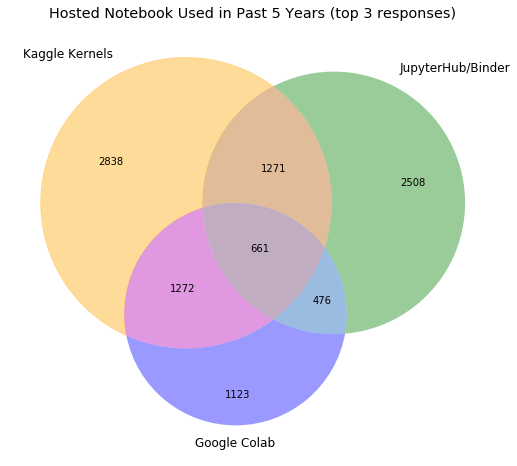

In [16]:
plt.figure(figsize=(15, 8))
c = venn3(subsets=(len(notebook_qs.loc[(notebook_qs['Kaggle Kernels'] == 1) & (notebook_qs['JupyterHub/Binder'] == 0) & (notebook_qs['Google Colab'] == 0)]),
               len(notebook_qs.loc[(notebook_qs['Kaggle Kernels'] == 0) & (notebook_qs['JupyterHub/Binder'] == 1) & (notebook_qs['Google Colab'] == 0)]),
               len(notebook_qs.loc[(notebook_qs['Kaggle Kernels'] == 1) & (notebook_qs['JupyterHub/Binder'] == 1) & (notebook_qs['Google Colab'] == 0)]),
               len(notebook_qs.loc[(notebook_qs['Kaggle Kernels'] == 0) & (notebook_qs['JupyterHub/Binder'] == 0) & (notebook_qs['Google Colab'] == 1)]),
               len(notebook_qs.loc[(notebook_qs['Kaggle Kernels'] == 1) & (notebook_qs['JupyterHub/Binder'] == 0) & (notebook_qs['Google Colab'] == 1)]),
               len(notebook_qs.loc[(notebook_qs['Kaggle Kernels'] == 0) & (notebook_qs['JupyterHub/Binder'] == 1) & (notebook_qs['Google Colab'] == 1)]),
               len(notebook_qs.loc[(notebook_qs['Kaggle Kernels'] == 1) & (notebook_qs['JupyterHub/Binder'] == 1) & (notebook_qs['Google Colab'] == 1)])),
      set_labels=('Kaggle Kernels', 'JupyterHub/Binder', 'Google Colab'))
plt.title('Hosted Notebook Used in Past 5 Years (top 3 responses)')
c.get_patch_by_id('10').set_color('orange')
plt.show()

# Freeform Responses
The survey question we are exploring provided a list of options for respondents to select from. There is an obvious selection bias against any IDE not on that list. We can however explore the freeform responses some users chose to provide. The wordcloud below makes some of the most popular IDEs that were not selection options. Eclipse, emacs, netbeans, xcode, octave all are very popular freeform responses. Kaggle should consider including these as options in the 2019 survey.

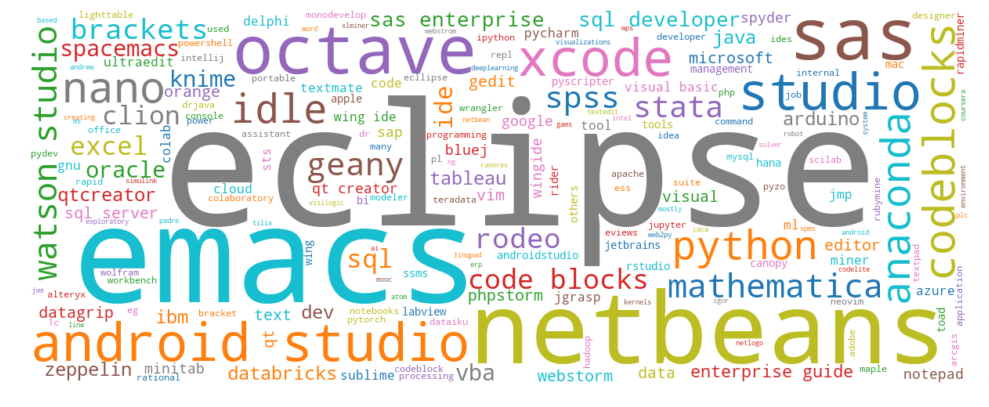

In [17]:
# Load freeform responses
ff = pd.read_csv('../input/freeFormResponses.csv')

# Format into lower strings
ff['count'] = 1
ff['IDE_lower'] = ff['Q13_OTHER_TEXT'].str.lower()
ff.drop(0)[['IDE_lower','count']].groupby('IDE_lower').sum()[['count']].sort_values('count', ascending=False)

# Create wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.figure(figsize=[15,8])

# Create and generate a word cloud image:
ide_words = ' '.join(ff['IDE_lower'].drop(0).dropna().values)
wordcloud = WordCloud(colormap="tab10",
                      width=1200,
                      height=480,
                      normalize_plurals=False,
                      background_color="white",
                      random_state=5).generate(ide_words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# The 4 Types of Kagglers (by IDE use)

<center>
<table align="center"><tr>
    <td>   <center> <font size="3" color="#131516">The Jupyter Lover</font> </center>
            <img src="https://upload.wikimedia.org/wikipedia/en/thumb/3/34/Leslie_Knope_%28played_by_Amy_Poehler%29.png/240px-Leslie_Knope_%28played_by_Amy_Poehler%29.png" alt="Jupyter Lover" style="width: 175px;"> </td>
<td>    <center>  <font size="3" color="#131516">The Jack of All IDEs</font> </center>
            <img src="https://upload.wikimedia.org/wikipedia/en/thumb/4/47/Andy_Dwyer.jpg/175px-Andy_Dwyer.jpg" alt="Jack Of All IDES" style="width: 175px;"> </td>
<td>    <center> <font size="3" color="#131516">The RStudio + Jupyter</font> </center>
           <img src="https://upload.wikimedia.org/wikipedia/en/thumb/1/1f/Tom_Haverford.jpg/260px-Tom_Haverford.jpg" alt="Rstudio + Jupyter" style="width: 175px;"> </td>
<td>     <center> <font size="3" color="#131516">The Anti-Jupyter</font>  </center>
                <img src="https://upload.wikimedia.org/wikipedia/en/thumb/a/ae/RonSwanson.jpg/250px-RonSwanson.jpg" alt="Anti-Jupyter" style="width: 175px;"> </td>
</table>
</center>

Next we will use the KMeans clustering algorithm to divide the kaggle survey respondents into four groups based solely on their IDE use. There are many resources that explain clustering.. [this is a great article that explains how KMeans works](https://bigdata-madesimple.com/possibly-the-simplest-way-to-explain-k-means-algorithm/). As the author of the attached article states "For choosing an appropriate value for K, just run the experiment using different values of K and see which ones generate good results. " That is exactly what we've done. First experiementing with 3 clusters, but finding that 4 made a more clearly defined groups. 

\* *There is technically a 5th group because I chose to exclude those respondents who didn't select any answer for this question, since including them would essentially have them take over one of our groups.*

In [18]:
# Create IDE binary dataset, dropping no responses
ide_qs_binary = ide_qs.rename(columns=column_rename).fillna(0).replace('[^\\d]',1, regex=True)
ide_qs_binary['no reponse'] = ide_qs_binary.sum(axis=1).apply(lambda x: 1 if x == 0 else 0)
ide_qs_binary = ide_qs_binary.loc[ide_qs_binary['no reponse'] == 0].drop('no reponse', axis=1).copy()

# Make the clusters using sklean's KMeans
from sklearn.cluster import KMeans
y_pred = KMeans(n_clusters=4, random_state=1).fit_predict(ide_qs_binary)
ide_qs_binary['cluster'] = y_pred

# Name the clusters
y_pred_named = ['Cluster1' if x == 0 else \
                'Cluster2' if x == 1 else \
                'Cluster3' if x == 2 else \
                'Cluster4' for x in y_pred]

ide_qs_binary['cluster_name'] = y_pred_named

cluster1 = ide_qs_binary.loc[ide_qs_binary['cluster'] == 0]
cluster2 = ide_qs_binary.loc[ide_qs_binary['cluster'] == 1]
cluster3 = ide_qs_binary.loc[ide_qs_binary['cluster'] == 2]
cluster4 = ide_qs_binary.loc[ide_qs_binary['cluster'] == 3]

ide_qs_binary = ide_qs_binary.replace({ide_qs_binary.groupby('cluster_name').sum().sort_values('Jupyter/IPython', ascending=False).iloc[0].name: 'Jupyter Lovers',
                     ide_qs_binary.groupby('cluster_name').sum().sort_values('Jupyter/IPython', ascending=True).iloc[0].name: 'Anti-Jupyters',
                     ide_qs_binary.groupby('cluster_name').sum().sort_values('RStudio', ascending=False).iloc[0].name: 'RStudio and Jupyter',
                     ide_qs_binary.groupby('cluster_name').sum().sort_values('PyCharm', ascending=False).iloc[0].name: 'Jack of All IDEs'}).copy()

mc_and_ide['cluster_name'] = ide_qs_binary['cluster_name']
mc_and_ide['cluster_name'] = mc_and_ide['cluster_name'].fillna('No Response')
mc_and_ide['count'] = 1

Great! Now lets return to the venn-diagrams that we started with. These do a great job of showing us how unique our clusters actually are. Note that the venn-diagrams show the top three IDEs for each group. We can also clearly see the distint differences in groups by simply plotting out the number of respondents that use each IDE.

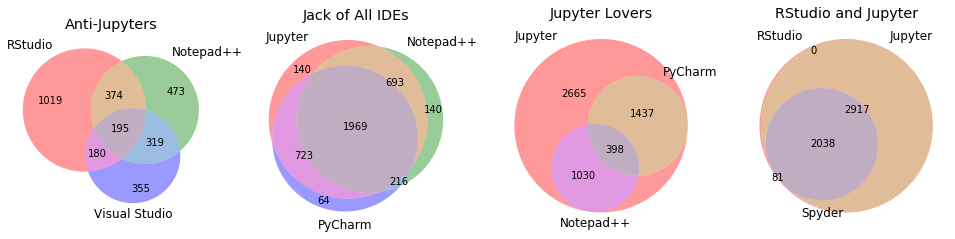

In [19]:
def ven3_jrn(df):
    #df = df.rename({'Jupyter/IPython':'Jupyter'}, axis=1)
    top_3 = d.groupby('cluster_name').sum().T.sort_values(i, ascending=False).drop('cluster').index[:3].values
    return venn3(subsets=(len(df.loc[(df[top_3[0]] == 1) & (df[top_3[1]] == 0) & (df[top_3[2]] == 0)]),
               len(df.loc[(df[top_3[0]] == 0) & (df[top_3[1]] == 1) & (df[top_3[2]] == 0)]),
               len(df.loc[(df[top_3[0]] == 1) & (df[top_3[1]] == 1) & (df[top_3[2]] == 0)]),
               len(df.loc[(df[top_3[0]] == 0) & (df[top_3[1]] == 0) & (df[top_3[2]] == 1)]),
               len(df.loc[(df[top_3[0]] == 1) & (df[top_3[1]] == 0) & (df[top_3[2]] == 1)]),
               len(df.loc[(df[top_3[0]] == 0) & (df[top_3[1]] == 1) & (df[top_3[2]] == 1)]),
               len(df.loc[(df[top_3[0]] == 1) & (df[top_3[1]] == 1) & (df[top_3[2]] == 1)])),
      set_labels=(top_3[0], top_3[1], top_3[2]))

plt.figure(figsize=(15, 10))
n = 1

for i, d in ide_qs_binary.rename({'Jupyter/IPython':'Jupyter'}, axis=1).groupby('cluster_name'):
    plt.subplot(1, 4, n)
    ven3_jrn(d)
    plt.title(i)
    n += 1
plt.show()

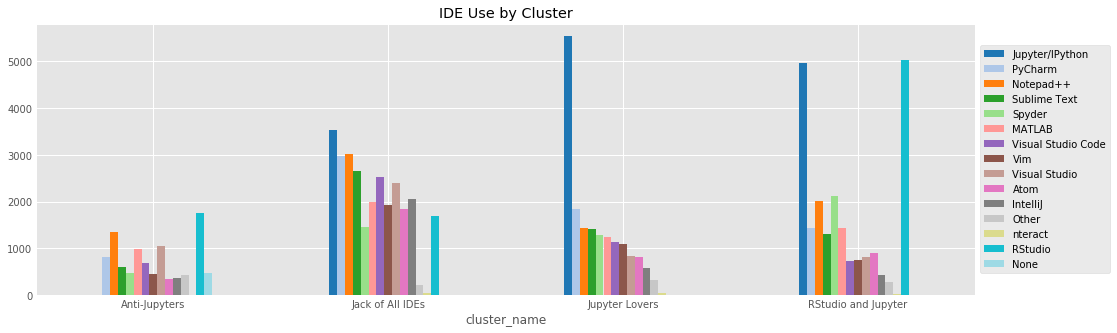

In [20]:
ide_qs_binary.groupby('cluster_name') \
    .sum() \
    .T \
    .sort_values('Jupyter Lovers', ascending=False) \
    .T \
    .drop('cluster', axis=1) \
    .plot(kind='bar', figsize=(15, 5), title='IDE Use by Cluster', rot=0, colormap=plt.get_cmap('tab20'))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

To make things easier to conceptualize lets take the liberty in naming each of our clusters. These names are not perfect, but they help us delineate between the four types of kagglers.

## The Jupyter Lover
<img src="https://am21.akamaized.net/tms/cnt/uploads/2015/03/Leslie-Knope-Finale.png" alt="Jupyter" style="width: 300px;">
- These people tend to use Jupyter more than any other IDE, they also tend to use Jupyer exclusively.
- 5549 respondents
- Famous Quote - "This is my jupyter notebook there are many like it but this one is mine" 

## Jack of All IDEs
<img src="https://s3.amazonaws.com/dailybreak_images_prod/af55805c-191d-48fb-858a-b0d1bcf4f608" alt="RStudio" style="width: 300px;">
- These kagglers use Jupyter like group 1, but tend to also use many other IDEs like PyCharm, and Notepad++
- 4222 respondents
- Famous Quote - "Heard of any new IDEs I could try?"

## RStudio + Jupyer
 <img src="https://i.imgur.com/PvZozxt.jpg" alt="PyCharm" style="width: 300px;">
- These respondents use both RStudio and Jupyter. They may use other IDEs aswell.
- 5872 respondents
- Famous Quote -"RStudio is my first love, but I still dabble in Jupyter from time to time"
 
## Anti-Jupyter
<img src="https://cdn-images-1.medium.com/max/950/0*rS2RVUK6WBTkmaeO.jpg" alt="Notepad" style="width: 300px;">
- These kagglers don't use Jupyter at all. While some use IDEs, many of them selected no IDEs at all. This group contains many non-coders but also very specialized IDE users that use one IDE exclusively.
- 4588 respondents
- Famous Quote - "Jupyter.... no thanks I'll stick to a real IDE"


## Non Responder
<img src="https://www.funeralwise.com/digital-dying/wp-content/uploads/sites/4/nggallery/2015-tv-character-deaths/PARKS-gary-larry-jerry.jpg" alt="Sublime" style="width: 300px;">
- We droped the respondents that didn't answer anything for this question- the assumption being that they didn't take the time to select any answer including 'none' so we will no use them for clustering. 
- 4743 respondents
- Famous Quote - "..............................."


# Who are the Anti-Jupyters?

<img src="http://blackwallstreetmagazine.com/wp-content/uploads/2016/07/who-are-they.jpg" alt="Who are they?" style="width: 300px;">

After futher exploration it became evident that the anti-jupyters were the interesting group of the four. When how the groups answered other survey questions, this group stood out as unique in many ways. We will examine 5 specific areas where the non jupyter users differ significantly compared to the rest of the kaggle population.

### 1. Anti-Jupyters are more diverse in their use of programming languages
While Python is the clear favorite amonst all kagglers, and R is a close second. We find the the non-jupyter cluster has consistantly more percentage of their group that chooses other programming languages as their language of choice. It stands out that those that don't use jupyter may fall into these two categories:
- Stictly R Users: who prefer to use RStudio and rather not deal with jupyter's R integration.
- Database engineers: Who code much in raw SQL
- Software Developers: who code in languages like C++, C# and Javascript
- Excel users who code in VBA
- Specialized programmers who prefer non-open source langagues like SAS and STATA

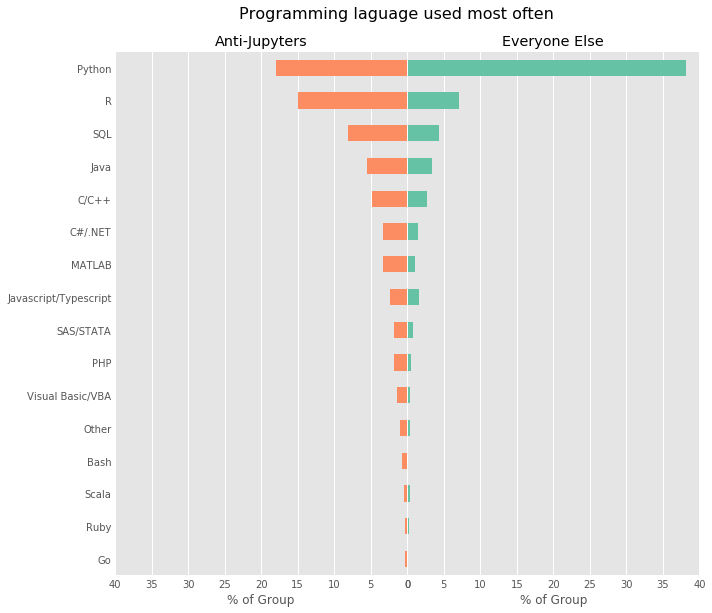

In [21]:
# Credit for 
color_pal = sns.color_palette("Set2", 11)

anti_jupyters = mc_and_ide.loc[mc_and_ide['cluster_name'] == 'Anti-Jupyters']
everyone_else = mc_and_ide.loc[mc_and_ide['cluster_name'] != 'Anti-Jupyters']
df = pd.DataFrame([everyone_else.groupby('Q17').count()['count'] / len(everyone_else) * 100,
              anti_jupyters.groupby('Q17').count()['count'] / len(anti_jupyters) * 100]).T
df.columns = ['Everyone Else','Anti-Jupyters']
df = df[['Anti-Jupyters', 'Everyone Else']]
df = df.sort_values('Anti-Jupyters').drop('Julia')

# Plot 1
plt.subplot(1, 2, 1)
ax1 = df['Anti-Jupyters'].plot(kind='barh', figsize=(10, 8), color=color_pal[1], title='Anti-Jupyters')
ax1_y = ax1.get_yaxis()
ax1_y.set_visible(True)
ax1.set_xlim(0,40)
ax1.invert_xaxis()
ax1.grid(axis='y')

# Plot 2
plt.subplot(1, 2, 2)
ax2 = df['Everyone Else'].plot(kind='barh', figsize=(10, 8), color=color_pal[0], title='Everyone Else')
ax2_y = ax2.get_yaxis()
ax2.grid(axis='y')
ax2_y.set_visible(False)
ax2.set_xlim(0,40)

# Title and make tight
plt.suptitle('Programming laguage used most often', fontsize=16, y=1.03, x=0.555)
plt.tight_layout()
plt.subplots_adjust(wspace=0)
ax1.set_xlabel('% of Group')
ax2.set_xlabel('% of Group')
plt.show()

### 2. Anti-Jupyters are more likely to code less
Are you in the non jupyter group? It's more likely you spend less time coding. Use jupyter? You probably spend more time coding. There however is one exception. Anti-Jupyters actually have a higher percentage of their group that codes 100% of the time.

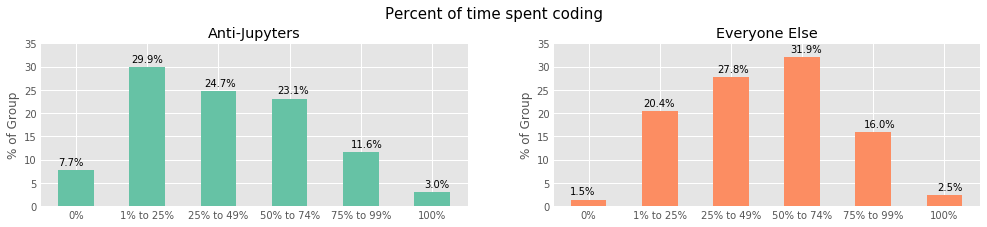

In [22]:
anti_jupyters = mc_and_ide.loc[mc_and_ide['cluster_name'] == 'Anti-Jupyters']
everyone_else = mc_and_ide.loc[mc_and_ide['cluster_name'] != 'Anti-Jupyters']
df = pd.DataFrame([everyone_else.groupby('Q23').count()['count'] / everyone_else.groupby('Q23').count().dropna()['count'].sum() * 100,
              anti_jupyters.groupby('Q23').count()['count'] / anti_jupyters.groupby('Q23').count().dropna()['count'].sum() * 100]).T
df.columns = ['Everyone Else','Anti-Jupyters']
df = df[['Anti-Jupyters', 'Everyone Else']]
# Rename and Order the columns
df = df.rename({'0% of my time': '0%',
                '1% to 25% of my time': '1% to 25%', 
                '25% to 49% of my time': '25% to 49%',
                '50% to 74% of my time' : '50% to 74%',
                '75% to 99% of my time' : '75% to 99%',
                '100% of my time': '100%'})

df.index = pd.Categorical(df.index, ['0%',
                                     '1% to 25%', 
                                     '25% to 49%',
                                     '50% to 74%',
                                     '75% to 99%',
                                     '100%'])

df = df.sort_index()
plt.subplot(1, 2, 1)
ax = df['Anti-Jupyters'].plot(kind='bar',
                         color=color_pal[0],
                         figsize=(15, 3),
                         title='Anti-Jupyters',
                         rot=0)
for p in ax.patches:
    ax.annotate(str(p.get_height().round(1)) + '%', (p.get_x() * 1.03, p.get_height() + 1.03))

plt.ylabel('% of Group')
plt.ylim(0,35)
plt.subplot(1, 2, 2)
ax2 = df['Everyone Else'].plot(kind='bar',
                         color=color_pal[1],
                         figsize=(15, 3),
                         title='Everyone Else',
                         rot=0)
for p in ax2.patches:
    ax2.annotate(str(p.get_height().round(1)) + '%', (p.get_x() * 1.03, p.get_height() + 1.03))
    
plt.ylabel('% of Group')
plt.ylim(0,35)
plt.suptitle('Percent of time spent coding', fontsize=15, y=1.05)

plt.show()

### 3. Anti-Jupyters have less expereince with Machine Learning, but they plan to learn it!
The percentage of non jupyter users are much higher for those with <1 year of experience with machine learning. They also have a much higher percentage of that plan to learn machine learning methods. These would be the perfect type of user that the kaggle team should make an effort to encourage using kaggle kernels!

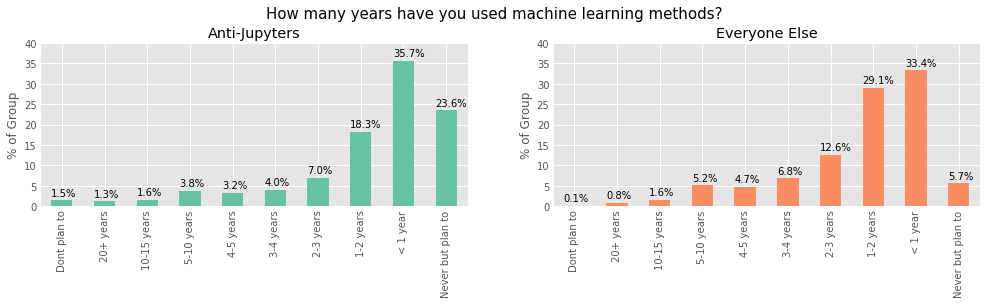

In [23]:
anti_jupyters = mc_and_ide.loc[mc_and_ide['cluster_name'] == 'Anti-Jupyters']
everyone_else = mc_and_ide.loc[mc_and_ide['cluster_name'] != 'Anti-Jupyters']
df = pd.DataFrame([everyone_else.groupby('Q25').count()['count'] / everyone_else.groupby('Q25').count().dropna()['count'].sum() * 100,
              anti_jupyters.groupby('Q25').count()['count'] / anti_jupyters.groupby('Q25').count().dropna()['count'].sum() * 100]).T
df.columns = ['Everyone Else','Anti-Jupyters']

# Order the columns
df.index = pd.Categorical(df.index, ['I have never studied machine learning but plan to learn in the future',
                                     '< 1 year',
                                     '1-2 years',
                                     '2-3 years',
                                     '3-4 years',
                                     '4-5 years',
                                     '5-10 years',
                                     '10-15 years',
                                     '20+ years',
                                     'I have never studied machine learning and I do not plan to'])
df = df.sort_index(ascending=False)
df = df.rename({'I have never studied machine learning but plan to learn in the future' : 'Never but plan to',
           'I have never studied machine learning and I do not plan to': 'Dont plan to'})
plt.subplot(1, 2, 1)
plt.ylim(0,40)
plt.ylabel('% of Group')
ax = df['Anti-Jupyters'].plot(kind='bar',
                         color=color_pal[0],
                         figsize=(15, 3),
                         title='Anti-Jupyters')
for p in ax.patches:
    ax.annotate(str(p.get_height().round(1)) + '%', (p.get_x() * 1, p.get_height() + 1.05))
plt.subplot(1, 2, 2)
plt.ylim(0,40)
ax2 = df['Everyone Else'].plot(kind='bar',
                         color=color_pal[1],
                         figsize=(15, 3),
                         title='Everyone Else')
for p in ax2.patches:
    ax2.annotate(str(p.get_height().round(1)) + '%', (p.get_x() * 1, p.get_height() + 1.05))
plt.ylabel('% of Group')
plt.suptitle('How many years have you used machine learning methods?', fontsize=15, y=1.05)
plt.show()

### 4. Those that use Jupyter are much more likely to consider themselves "Data Scientists"
While around 55% of respondents who use jupyter consider themselves a data scientist. On the other hand 41.3% of the non jupyter user group consider themselves data scientists.

Those who consider themselves "definately not" data scientists consist of 13.7% of anti-jupyters while that percentage is only 6.8% of the rest of respondents.

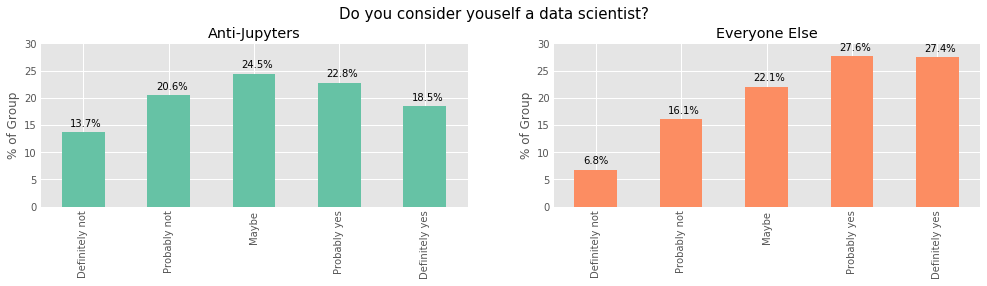

In [24]:
anti_jupyters = mc_and_ide.loc[mc_and_ide['cluster_name'] == 'Anti-Jupyters']
everyone_else = mc_and_ide.loc[mc_and_ide['cluster_name'] != 'Anti-Jupyters']
df = pd.DataFrame([everyone_else.groupby('Q26').count().dropna()['count'] / everyone_else.groupby('Q26').count().dropna()['count'].sum() * 100,
              anti_jupyters.groupby('Q26').count()['count'] / anti_jupyters.groupby('Q26').count().dropna()['count'].sum() * 100]).T
df.columns = ['Everyone Else','Anti-Jupyters']

# Order the columns
df.index = pd.Categorical(df.index, ['Definitely not', 'Probably not', 'Maybe', 'Probably yes', 'Definitely yes'])
df = df.sort_index(ascending=True)

plt.subplot(1, 2, 1)
plt.ylim(0,30)
plt.ylabel('% of Group')
ax = df['Anti-Jupyters'].plot(kind='bar',
                         color=color_pal[0],
                         figsize=(15, 3),
                         title='Anti-Jupyters')
for p in ax.patches:
    ax.annotate(str(p.get_height().round(1)) + '%', (p.get_x() + 0.1, p.get_height() + 1.05))
plt.subplot(1, 2, 2)
plt.ylim(0,30)
ax2 = df['Everyone Else'].plot(kind='bar',
                         color=color_pal[1],
                         figsize=(15, 3),
                         title='Everyone Else')
for p in ax2.patches:
    ax2.annotate(str(p.get_height().round(1)) + '%', (p.get_x() + 0.1, p.get_height() + 1.05))
plt.ylabel('% of Group')
plt.suptitle('Do you consider youself a data scientist?', fontsize=15, y=1.05)
plt.show()

### 5. Anti-Jupyters spend less time exploring for model insights
Jupyter is well known for it's use in explorative and iterative scientific programming. As such, those who spend less time exloring for model insights also tend to be in the anti-Jupyter group.

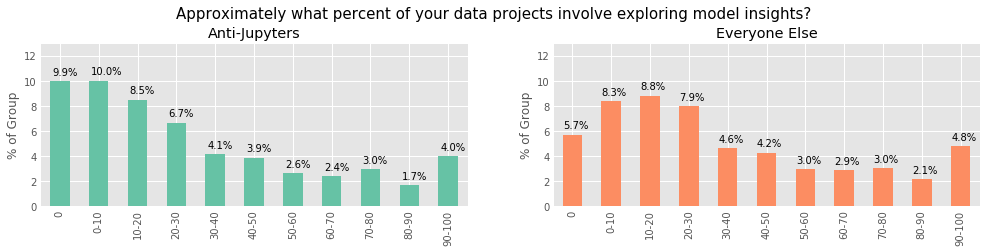

In [25]:
anti_jupyters = mc_and_ide.loc[mc_and_ide['cluster_name'] == 'Anti-Jupyters']
everyone_else = mc_and_ide.loc[mc_and_ide['cluster_name'] != 'Anti-Jupyters']
df = pd.DataFrame([everyone_else.groupby('Q46').count()['count'] / len(everyone_else) * 100,
              anti_jupyters.groupby('Q46').count()['count'] / len(anti_jupyters) * 100]).T
df.columns = ['Everyone Else','Anti-Jupyters']

# Order the columns
df.index = pd.Categorical(df.index, ['0', '0-10','10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100'
       ])
plt.subplot(1, 2, 1)
plt.ylim(0,13)
plt.ylabel('% of Group')
ax = df['Anti-Jupyters'].plot(kind='bar',
                         color=color_pal[0],
                         figsize=(15, 3),
                         title='Anti-Jupyters')
for p in ax.patches:
    ax.annotate(str(p.get_height().round(1)) + '%', (p.get_x() + 0.05, p.get_height() + 0.5))
plt.subplot(1, 2, 2)
plt.ylim(0,13)
ax2 = df['Everyone Else'].plot(kind='bar',
                         color=color_pal[1],
                         figsize=(15, 3),
                         title='Everyone Else')
for p in ax2.patches:
    ax2.annotate(str(p.get_height().round(1)) + '%', (p.get_x() + 0.005, p.get_height() + 0.5))
plt.ylabel('% of Group')
plt.suptitle('Approximately what percent of your data projects involve exploring model insights?', fontsize=15, y=1.05)
plt.show()

# What can we take away from this analysis?

In this analysis, we've looked at the responses from the 2018 Kaggle survey. Specifically, we looked at the types of development environments (or IDES) that Kagglers have said they've used over the past 5 years. We found some interesting relationships between the software and tools that kagglers use and how it relates to their job title, salary, and country of origin. We not only looked at what IDEs were popular, but how respondents overlapped in their use of different IDEs. By looking into the freeform responses, we've identified some popular IDEs that the kaggle team might want to include in next year's survey.

Finally, we used unsupervised machine learning techniques to cluster the kaggle respondents into four distinct groups. These groups were each unique, but the cluster that consisted of respondents who had not used Jupyter/IPython stood out in their responses to the other survey questions as being the least like the other groups. The "Ani-Jupyter" group tends to be more diverse in their use of programming languages, less likely to consider themselves a Data Scientist, and they spend less time in data projects exploring for model insights.  This is not to say that the anti-Jupyter group does not want to learn new things.  Suprisingly, 23.6% of them say they "have never used machine learning methods **but plan to**".

The anti-Jupyter (or non-jupyter) are an important part of the kaggle community. Whether they are experienced software developers who aren't interested in using jupyter - or if they are new to programming and data science- they are part of the community that Kaggle should focus on reaching. Kaggle Kernels are a great resource and remove many of the barriers that some of the community may have with installing Jupyter on their local computers. Hopefully, more of them will join the community, become involved in using Kaggle kernels, and help us grow and become more diverse.

Thanks for reading!